# Steps

1. Subtract the mean from X
2. Calculate Cov(X,X)
3. Calculate eigenvectors and eigenvalues of the covarience matrix
4. Sort the eigenvectors according to their eigenvalues in decreasing order
5. Choose first k eigenvectors and that will be the new k dimensions
6. Transform the original n-dimensional data points into k dimensions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        # mean centering
        self.mean = np.mean(X, axis=0)
        X = X -  self.mean

        # covariance, functions needs samples as columns
        cov = np.cov(X.T)

        # eigenvectors, eigenvalues
        eigenvectors, eigenvalues = np.linalg.eig(cov)

        # eigenvectors v = [:, i] column vector, transpose this for easier calculations
        eigenvectors = eigenvectors.T

        # sort eigenvectors
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]

        self.components = eigenvectors[:self.n_components]

    def transform(self, X):
        # projects data
        X = X - self.mean
        return np.dot(X, self.components.T)

In [3]:
data = datasets.load_iris()
X = data.data
y = data.target

In [4]:
pca = PCA(2)
pca.fit(X)
X_projected = pca.transform(X)

In [5]:
X.shape

(150, 4)

In [6]:
X_projected.shape

(150, 2)

In [7]:
x1 = X_projected[:, 0]
x2 = X_projected[:, 1]

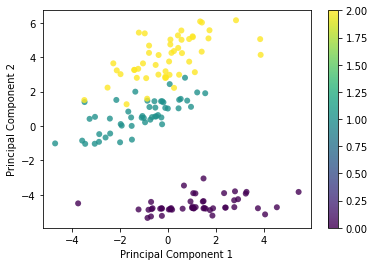

In [8]:
plt.scatter(x1, x2, c=y, edgecolor="none", alpha=0.8)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar()
plt.show()